<a href="https://colab.research.google.com/github/Imen-Jaballi/Predict-Laptop-Prices/blob/main/PredictingStockPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Laptop Price Prediction**

***Metodology***

1.**Selected Algorithm:** Linear Regresson

2.**Used Technologies:** python and PyCharm.





In [ ]:
#First, import the following libraries. They will be used to different tasks in the future for working with data in python.
#Import the dependencies
#NumPy is the fundamental package for scientific computing with Python. It contains among other things like for exemple a powerful N-dimensional array object.
import numpy as np
# pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. 
import pandas as pd 
import io
#matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.
import matplotlib.pyplot as plt
#Provides train/test indices to split data in train/test sets.
from sklearn.model_selection import train_test_split
#the mean squared error (MSE) or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and what is estimated.
from sklearn.metrics import mean_squared_error
#The sklearn.linear_model module implements generalized linear models. It includes Ridge regression, Bayesian Regression, Lasso and Elastic Net estimators computed with Least Angle Regression and coordinate descent. It also implements Stochastic Gradient Descent related algorithms.
from sklearn import linear_model

**I.	Exploratory data analysis**

Exploratory data analysis is the process of exploring your data, and it typically includes examining the structure and components of your dataset, the distributions of individual variables, and the relationships between two or more variables. The most heavily relied upon tool for exploratory data analysis is visualizing data using a graphical representation of the data. 


**1. Downloading the dataset**

You can download all the important documents from Kaggle website. This is the Link: https://www.kaggle.com/ionaskel/laptop-prices

**2.	Read in your data**

•	The first thing we do for a prediction problem is to divide the data into a training dataset and a testing dataset.

•	The training dataset is for developing and fitting the model and the testing dataset is for evaluating our fitted model and estimating its error rate. We use a random 75% of the observations to serve as the training dataset. The remaining 25% will serve as the test dataset.

In [ ]:
from google.colab import files
uploaded = files.upload()
# We can use Pandas to read in csv files. the pd.read_csv() method creates a DataFrame from a csv file.
# Dataset is now stored in a Pandas Dataframe
train = pd.read_csv('Train.csv',encoding = 'ISO-8859-1', sep=',',header=0)
test = pd.read_csv('Test.csv',encoding = 'ISO-8859-1', sep=',',header=0)



Saving Test.csv to Test.csv
Saving Train.csv to Train.csv


**3.	Check the packaging**

•	Check the number of rows

•	Check the number of  columns

•	Examine the classes of each of the columns to make sure they are correctly specified.


In [ ]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 13 columns):
0                   1041 non-null object
Company             1036 non-null object
Product             1036 non-null object
TypeName            1036 non-null object
Inches              1036 non-null float64
ScreenResolution    1036 non-null object
Cpu                 1036 non-null object
Ram                 1036 non-null object
Memory              1036 non-null object
Gpu                 1036 non-null object
OpSys               1036 non-null object
Weight              1036 non-null object
Price_euros         1036 non-null float64
dtypes: float64(2), object(11)
memory usage: 105.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 13 columns):
0                   262 non-null object
Company             259 non-null object
Product             259 non-null object
TypeName            259 non-null object
Inches              259 non-null float

**4.	Look at the top and the bottom of your data**

In [ ]:
print(train.head())
print(train.tail())
print(test.head())
print(test.tail())

   0 Company      Product  ...  OpSys  Weight Price_euros
0  1   Apple  MacBook Pro  ...  macOS  1.37kg     1339.69
1  2   Apple  Macbook Air  ...  macOS  1.34kg      898.94
2  3      HP       250 G6  ...  No OS  1.86kg      575.00
3  4   Apple  MacBook Pro  ...  macOS  1.83kg     2537.45
4  5   Apple  MacBook Pro  ...  macOS  1.37kg     1803.60

[5 rows x 13 columns]
         0  Company          Product  ...       OpSys  Weight Price_euros
1036  1050       HP      ProBook 450  ...  Windows 10  2.04kg      742.00
1037  1051  Toshiba  Tecra Z40-C-136  ...  Windows 10  1.47kg     1725.00
1038  1052     Dell   Latitude E5570  ...   Windows 7  2.09kg     1062.95
1039  1053       HP      ProBook 440  ...  Windows 10  1.64kg     1010.51
1040  1054   Lenovo   Yoga 500-15ISK  ...  Windows 10   1.8kg      847.00

[5 rows x 13 columns]
      0  Company                       Product  ...       OpSys  Weight Price_euros
0  1055     Vero  V142 (X5-Z8350/2GB/32GB/W10)  ...  Windows 10  1.45kg      2

**5.	Check your “n”s**

As you can see that the test has only 12 columns while the training has 13. this is due to the fact that the test data do not include the final sale price information.

In [ ]:

print("train data shape:",train.shape)
test_drop=np.array(test.drop(['Price_euros'],1))
print("test data shape:",test_drop.shape)


train data shape: (1041, 13)
test data shape: (262, 12)


**7.	Make a plot**

There are two key reasons for making a plot of your data. They are creating expectations and checking deviations from expectations.

•	If your dataset is big enough, it will be difficult to simply look at all the data. So making some sort of plot, which serves as a summary, will be a useful tool for setting expectations for what the data should look like.

•	Also making a plot can be a useful tool to see how well the data match your expectations. Plots are particularly good at letting you see deviations from what you might expect. 


-I had to do some plotting during the Exploration stage, and we will need to import that functionality into the environment as well. Plotting allows us to visualize the distribution of the data, check for outliers, and see other patterns that we might miss otherwise. I will use Matplotlib.

-There are a number of pre-defined styles provided by matplotlib. For example, there’s a pre-defined style called “ggplot”, which emulates the aesthetics of ggplot (a popular plotting package for R).

-You can also dynamically change the default rc settings in a python script or interactively from the python shell. All of the rc settings are stored in a dictionary-like variable called matplotlib.rcParams, which is global to the matplotlib package.



In [ ]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6) #figure.figsize   : 6.4, 4.8   # figure size in inches

**4.	Using Models to Explore Your Data**

**a. Data reducing**

It is the first element of a statistical model, the process of data reducing is typically ends up with a statistic which is any summary of the data like the mean, average, median, deviation ,max, min and range.

-The value I am trying to predict is often called the target variable. In here it is 'salePrice'. 

-To get more information about sales price like count, mean, std, min, max etc we use Series.describe() method.

In [ ]:
print (train.Price_euros.describe())

count    1036.000000
mean     1130.480058
std       697.887092
min       191.900000
25%       614.750000
50%       979.000000
75%      1474.250000
max      6099.000000
Name: Price_euros, dtype: float64


**b. Applying the normal model**
We are using the Normal distribution to tell us what the population looks like, not what the data look like. The key point here is that we used the Normal distribution to setup the shape of the distribution that we expect the data to follow. The Normal distribution is our expectation for what the data should look like.


a.   **skewness** is a measure of the shape of the distribution of values: Skewness is a measure of symmetry, or more precisely, the lack of symmetry.  A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

b.   **Kurtosis** is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.

Skew is: 1.6209885434122695


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


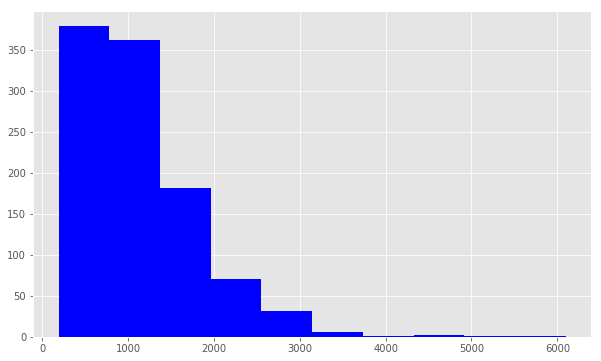

In [ ]:
#to plot a histogram of SalePrice
print ("Skew is:", train.Price_euros.skew())
plt.hist(train.Price_euros, color='blue')
plt.show()


* Notice that the distribution has a longer tail on the right, so the distribution is positively skewed.


* When performing regression, sometimes it makes sense to log-transform the target variable. One reason for this is to improve the linearity of the data.

* Importantly, the predictions generated by the final model will also be log-transformed, so we will need to convert these predictions back to their original form later. np.log() will transform the variable and np.exp() will reverse the transformation.


 Skew is: -0.13131548755021893


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


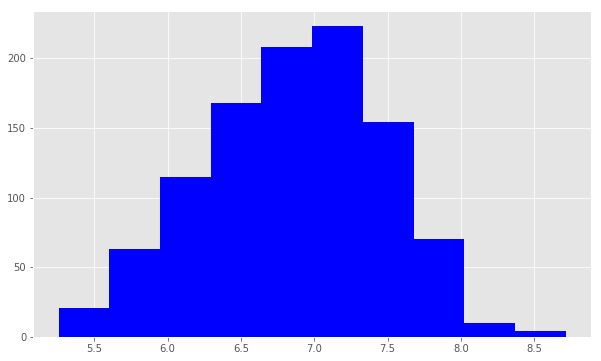

In [ ]:
target = np.log(train.Price_euros)
print ("\n Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

A value closer to 0 means that we have improved the skewness of the data. Now, we can see there is a normal distribution.



**8. Feature Engineering**

Feature Engineering is the process of making features of the data suitable for use in machinelearning and modelling.

 The DataFrame.corr() method displays the correlation or relationship between the columns then I can examine the correlations between **the features** and **the target**.
 
 In machine learning and pattern recognition, a feature is an individual measurable property or characteristic of a phenomenon being observed.[1] Choosing informative, discriminating and independent features is a crucial step for effective algorithms in pattern recognition, classification and regression. Features are usually numeric, but structural features such as strings and graphs are used in syntactic pattern recognition. The concept of "feature" is related to that of explanatory variable used in statistical techniques such as linear regression.
 

In [ ]:
#return a subset of columns matching the specified data types; Return a subset of the DataFrame’s columns based on the column dtypes.
numeric_features = train.select_dtypes(include=[np.number])
#numeric_features.dtypes
print(numeric_features.dtypes)

#displays the correlation between the columns and examine the correlations between the features and the target.
corr = numeric_features.corr()

#The first five features are the most positively correlated with SalePrice, while the next five are the most negatively correlated.
print (corr['Price_euros'].sort_values(ascending=False)[:5], '\n')
print (corr['Price_euros'].sort_values(ascending=False)[-5:])




Inches         float64
Price_euros    float64
dtype: object
Price_euros    1.000000
Inches         0.067853
Name: Price_euros, dtype: float64 

Price_euros    1.000000
Inches         0.067853
Name: Price_euros, dtype: float64


The first five features are the most positively correlated with SalePrice, while the next five are the most negatively correlated.

a. **Handling with outliers**

let's use plt.scatter() to generate some scatter plots and visualize the relationship between the  Inches and Price_euros 


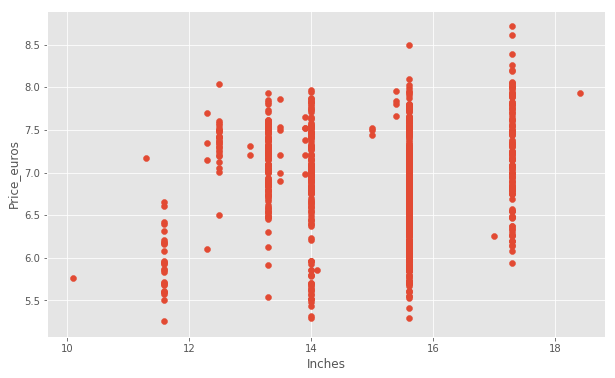

In [ ]:
#do the same for Inches.
plt.scatter(x=train['Inches'], y=target)
plt.ylabel('Price_euros')
plt.xlabel('Inches')
plt.show()

As you can see that there are many laptops with 14, 16 and 17 Inches. There are a few outliers as weel, outliers can affect a regression model by pulling the estimated regression line further away from the true population regression line. So we will remove those observatons from the data.

We will create a new dataframe with some outliers removed.


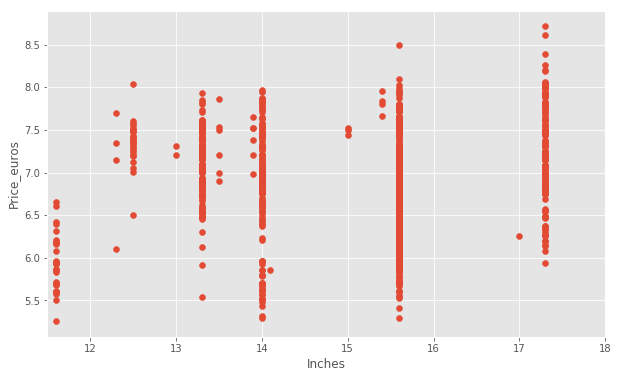

In [ ]:
train=train[train['Inches']<18]
train=train[train['Inches']>11.5]
#display the previous graph again without outliers
plt.scatter(x=train['Inches'], y=np.log(train.Price_euros))
plt.xlim(11.5,18) # This forces the same scale as before
plt.ylabel('Price_euros')
plt.xlabel('Inches')
plt.show()

**b. Handling Null Values**

I will create a DataFrame to view the top null columns. Chaining together the train.isnull().sum() methods, we return a series of the counts of the null values in each column.

In [ ]:
#create a DataFrame to view the top null columns and return the counts of the null values in each column
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
#nulls
print(nulls)


                  Null Count
Feature                     
Price_euros                0
Weight                     0
OpSys                      0
Gpu                        0
Memory                     0
Ram                        0
Cpu                        0
ScreenResolution           0
Inches                     0
TypeName                   0
Product                    0
Company                    0
0                          0


**c. Wrangling the Non-Numeric Features**

View non-numeric features



In [ ]:
categoricals = train.select_dtypes(exclude=[np.number])
print(categoricals.describe())

           0 Company Product  ...                    Gpu       OpSys Weight
count   1033    1033    1033  ...                   1033        1033   1033
unique  1033      19     508  ...                     98           8    164
top      507    Dell  XPS 13  ...  Intel HD Graphics 620  Windows 10  2.2kg
freq       1     243      23  ...                    249         873     99

[4 rows x 11 columns]


The count column indicates the count of non-null observations, while unique counts the number of unique values, top is the most commonly occuring value, with the frequency of the top value shown by freq.

**Transforming Features**

For many of these features, we might want to use one-hot encodling to make use of the information for modeling.

One-hot encoding is a technique which will transform categorical data into numbers so the model can understand whether or not a particular observation falls into one category or another.

When transforming features, it's important to remember that any transformations that you've applied to the training data before fitting the model must be applied to the test data.






In [ ]:
#1/ Consider the Company data: 
print ("Original: \n")
print (train.Company.value_counts(), "\n")

Original: 

Dell         243
Lenovo       230
HP           210
Asus         126
Acer          86
Toshiba       46
MSI           34
Apple         14
Samsung        8
Mediacom       7
Microsoft      6
Razer          5
Xiaomi         4
Google         3
Fujitsu        3
LG             3
Vero           2
Huawei         2
Chuwi          1
Name: Company, dtype: int64 



In the Company Column, the unique values are Dell, Lenovo, HP, Asus, Acer, Toshiba, MSI, Apple, Samsung, Mediacom, Microsoft, Razer, Xiaomi, Fujitsu, Google, LG, Vero, Huawei, Chuwi.. which describe the company name of the laptops. This model needs numerical data, so I have used one-hot encoding to transform the data into a Integer columns.

As mentioned earlier, I need To do this on both the train and test data.

In [ ]:
# Our model needs numerical data, so we will use one-hot encoding to transform the data into a Integer column.
#create a new column called enc_Company.
train['enc_Company'] = train['Company']
test['enc_Company'] = test['Company']
print(train)



         0  Company  ... Price_euros enc_Company
0        1    Apple  ...     1339.69       Apple
1        2    Apple  ...      898.94       Apple
2        3       HP  ...      575.00          HP
3        4    Apple  ...     2537.45       Apple
4        5    Apple  ...     1803.60       Apple
5        6     Acer  ...      400.00        Acer
6        7    Apple  ...     2139.97       Apple
7        8    Apple  ...     1158.70       Apple
8        9     Asus  ...     1495.00        Asus
9       10     Acer  ...      770.00        Acer
10      11       HP  ...      393.90          HP
11      12       HP  ...      344.99          HP
12      13    Apple  ...     2439.97       Apple
13      14     Dell  ...      498.90        Dell
15      16    Apple  ...     1518.55       Apple
16      17     Dell  ...      745.00        Dell
17      18    Apple  ...     2858.00       Apple
18      19   Lenovo  ...      499.00      Lenovo
19      20     Dell  ...      979.00        Dell
20      21     Asus 

In [ ]:
train['enc_Company']=train['Company'].apply(lambda t: 1 if t=='Dell' else 2 if t=='Lenovo' else 3 if t=='HP' else 4 if t=='Asus' else 5 if t=='Acer' else 6 if t=='Toshiba' else 7 if t=='MSI' else 8 if t=='Apple' else 9 if t=='Samsung' else 10 if t=='Mediacom' else 11 if t=='Microsoft' else 12 if t=='Razer' else  13 if t=='Xiaomi' else 14 if t=='LG' else  15 if t=='Fujitsu' else 16 if t=='Google' else 17 if t=='Vero' else  18 if t=='Huawei' else 19 if t=='Chuwi' else 0)
test['enc_Company']=test['Company'].apply(lambda t: 1 if t=='Dell' else 2 if t=='Lenovo' else 3 if t=='HP' else 4 if t=='Asus' else 5 if t=='Acer' else 6 if t=='Toshiba' else 7 if t=='MSI' else 8 if t=='Apple' else 9 if t=='Samsung' else 10 if t=='Mediacom' else 11 if t=='Microsoft' else 12 if t=='Razer' else  13 if t=='Xiaomi' else 14 if t=='LG' else  15 if t=='Fujitsu' else 16 if t=='Google' else 17 if t=='Vero' else  18 if t=='Huawei' else 19 if t=='Chuwi' else 0)

print (train.enc_Company.value_counts())  # The company values converted into Integers from 1 to 19.

  


1     243
2     230
3     210
4     126
5      86
6      46
7      34
8      14
9       8
10      7
11      6
12      5
13      4
14      3
15      3
16      3
18      2
17      2
19      1
Name: enc_Company, dtype: int64


Look at the Cpu by constructing and plotting a pivot table:


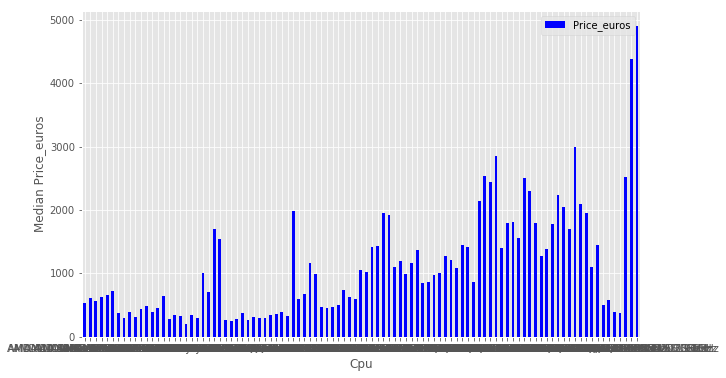

In [ ]:

#look at the Cpu by constructing and plotting a pivot table, as we did above for OverallQual
condition_pivot = train.pivot_table(index='Cpu', values='Price_euros', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Cpu')
plt.ylabel('Median Price_euros')
plt.xticks(rotation=0)
plt.show()

Notice that Intel Core i7 7820HK 2.9GHz has a significantly higher Median Price_euros than the others. We will encode this as a new feature. we select all the PC where CPU is eaqual to Intel Core i7 7820HK 2.9GHz and assign the value 1, otherwise 0.

In [ ]:
#encode this CPU as a new feature by using a similar method that we used for Street above
#def encode(x): return 1 if x == 'Intel Core i7 7820HK 2.9GHz' else 0
#train['Cpu'] = train.Cpu.apply(encode)
#test['Cpu'] = test.Cpu.apply(encode)

In [ ]:
#condition_pivot = train.pivot_table(index='Cpu', values='Price_euros', aggfunc=np.median)
#condition_pivot.plot(kind='bar', color='blue')
#plt.xlabel('Encoded Cpu')
#plt.ylabel('Median Price_euros')
#plt.xticks(rotation=0)
#plt.show()

**Dealing with Missing Values**

I will fill the missing values with an average value and then assign the results to data. This is a method of interpolation.

**The dataFrame.interpolated() method makes this simple**


In [ ]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()
print(sum(data.isnull().sum() != 0))


0


**II. Build a Linear Model**

Separate the features and the target variable for modeling. I will assign the features to X and the target variable to y.

I use np.log() as explained above to transform the y variable for the model. data.drop([features], axis=1)tells pandas which columns we want to exclude.

I won't include Price_euros since it is the target variable


In [ ]:
y = np.log(train.Price_euros)
x = data.drop(['Price_euros'], axis=1)

**a. Partition the Data**

Partitioning the data in this way allows us to evaluate how our model might perform on data that it has never seen before. if we train the model on all of the test data, it will be difficult to tell if overfitting has taken place.

also I have to state what proposition of the data should be in the test partition from train data set. in this exemple about 33% of the data is devoted to the hold-out set(Test data set)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)

**b. Create a Linear RegressIon Model**

First I instantiate the model.
lr = linear_model.LinearRegression()

then I need to fit the model, this is used to estimate the relationship between our predictors and the target variable so we can make accurate predictions on new data. I have filled the model using X_tarin and Y_train, and i have scored with x_test and y_test. The lr.fit() method will fit the linear regression on the Features and target variable that we pass.


In [ ]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

**c.Evaluate the Performance**

The r-squared value is a measure of how close the data are to the fitted regression line.

It takes a value between 0 and 1, 1 meaning that all of the variance in the target is explained by the data.

in general a higher r-squared value means a better fit.

the model.score() method returns the r-squared value by default.

In [ ]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.003309171199280203


Next I am going to consider root-mean-squared-error which measure the distance between the predicted values and actual values. To do so use the model i have build to make predictions on the test data set.
predictions=model.predict(X_test)

The mean_squared error function takes two arrays and calculates the RMSE


In [ ]:
predictions = model.predict(X_test)
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.37178818923197343


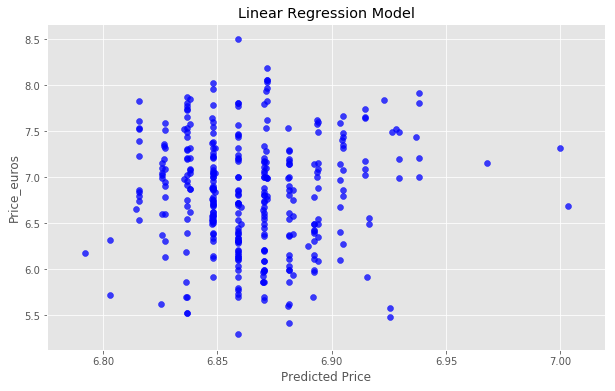

In [ ]:
# I can view this relationship graphically with a scatter plot
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Price_euros')
plt.title('Linear Regression Model')
plt.show()

If my predicted values were identical to the actual values, this graph whould be the straight-line y=x because each predicted value x would be equal to each actUal valuey.

**d. Improve the Model**

I havê tried using Ridge RegUlarization to decrease the inflUence of less important features. Ridge Regularization is a process which shrinks the regression coefficients of less important features.

I have to once again instantiate the model. the Ridge Regularization model takes a parameter, alpha, which controls the strength of the regularization. alpha is a hyper parameter


I have exprimented by looking throught a few diffrent values of alpha and see how this changes my results.


-0.006158067974623371


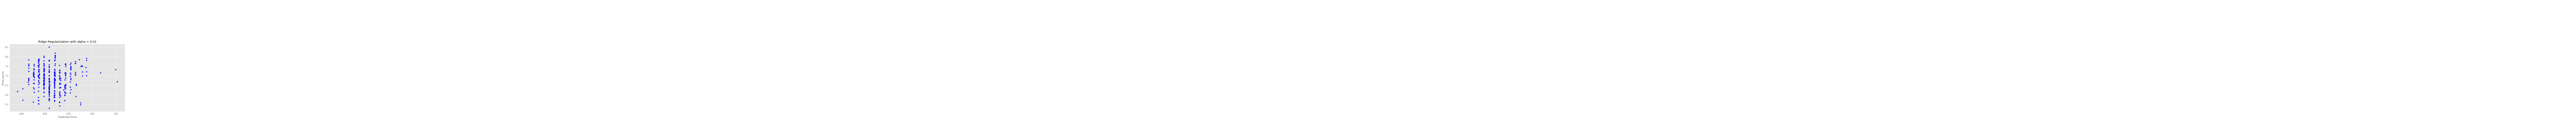

-0.006158070280845029


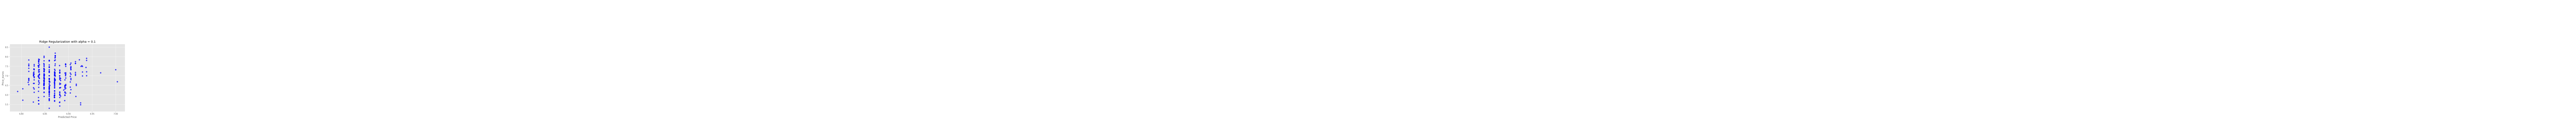

-0.006158093429806444


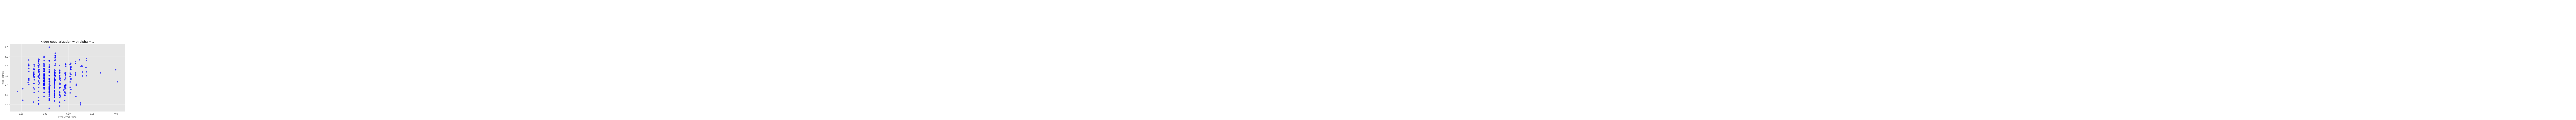

-0.006158333275182448


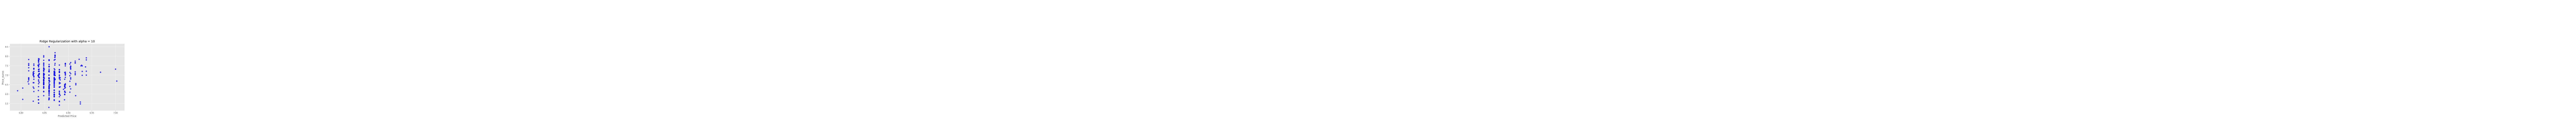

-0.006161291560765392


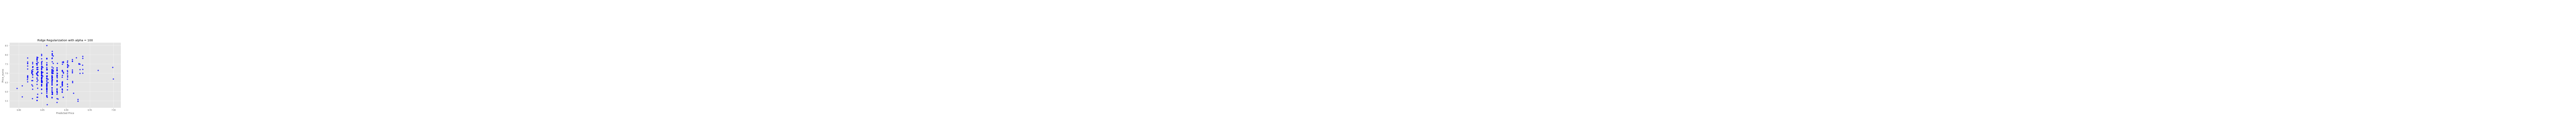

In [ ]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Price_euros')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(ridge_model.score(X_test, y_test),mean_squared_error(y_test, preds_ridge))
    print(ridge_model.score(X_test, y_test))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()
   

These models perform almost identically to the first model, in this case adjusting the alpha did not substantially improve the model except for alpha=100.


**e. Visualize Results and suBmit the .csv file**

create a csv that contains the predicted Price_euros for each observation in the test.csv dataset.
The first column must contain the ID from the test data.



-0.005707088711740527
0.37162154675930953


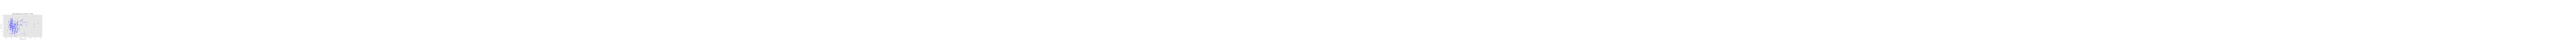

In [ ]:
alpha = 10000
rm = linear_model.Ridge(alpha=alpha)
ridge_model = rm.fit(X_train, y_train)
preds_ridge = ridge_model.predict(X_test)
plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Price_euros')
plt.title('Ridge Regularization with alpha = {}'.format(alpha))
overlay = 'R^2 is: {}\nRMSE is: {}'.format(ridge_model.score(X_test, y_test),mean_squared_error(y_test, preds_ridge))
print(ridge_model.score(X_test, y_test))
print(mean_squared_error(y_test, preds_ridge))
plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
plt.show()


In [ ]:
#create a csv that contains the predicted SalePrice for each observation in the test.csv dataset.
submission = pd.DataFrame()
#select the features from the test data for the model as we did above.
feats = test.select_dtypes(include=[np.number]).drop(['Price_euros'], axis=1).interpolate()
#generate our predictions.
predictions = model.predict(feats)
#transform the predictions to the correct form.
#apply np.exp() to our predictions becasuse we have taken the logarithm(np.log()) previously.
final_predictions = np.exp(predictions)
#check the difference
print("Original predictions are: \n", predictions[:10], "\n")
print("Final predictions are: \n", final_predictions[:10])
#assign these predictions
submission['SalePrice'] = final_predictions
#submission.head()
print(submission.head())
#export to a .csv file as Kaggle expects.
# pass index=False because Pandas otherwise would create a new index for us.
submission.to_csv('submission1.csv', index=False)
print(test.head())

Original predictions are: 
 [7.00288712 6.90344872 6.85915209 6.84784891 6.87022625 6.84784891
 6.9382988  6.88292801 6.82535706 6.83677475] 

Final predictions are: 
 [1099.80384786  995.70270254  952.55903931  941.85271351  963.16645454
  941.85271351 1031.01476314  975.47839472  920.9051602   931.4800279 ]
     SalePrice
0  1099.803848
1   995.702703
2   952.559039
3   941.852714
4   963.166455
      0  Company  ... Price_euros enc_Company
0  1055     Vero  ...      210.80          17
1  1056  Toshiba  ...     1425.00           6
2  1057   Lenovo  ...     1049.60           2
3  1058       HP  ...     1000.00           3
4  1059       HP  ...     2103.34           3

[5 rows x 14 columns]
